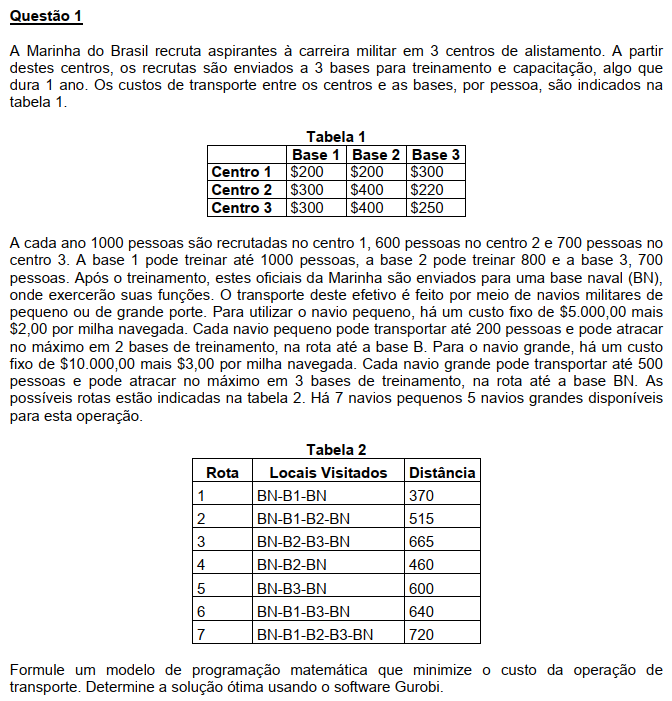

In [5]:
from IPython.display import Image
Image(filename='Questão_1.png')

In [6]:
import gurobipy as gp
import numpy as np


def imprime_resultados_geral(modelo):
    m = modelo
    if modelo.SolCount > 0:
        print('=========================================')
        print('Quantidade de restrições: ', m.NumConstrs)
        print('Quantidade de variáveis: ', m.NumVars)
        print('=========================================')
        print('Status do modelo: ', m.Status)
        print('=========================================')
        print('Valor da função objetivo: ', m.ObjVal)
        print('=========================================')
        for v in m.getVars():
            print('%s %g' % (v.varName, v.x))
        print('=========================================')

    else:
        print('Solução não encontrada')


'''################## Define os Parâmetros utilizados no modelo ##################'''
custo_de_treinamento_centro_base = np.array(
    [
        [200, 200, 300],
        [300, 400, 220],
        [300, 400, 250]
    ]
)
distancia = np.array(
    [
        [200, 200, 300],
        [300, 400, 220],
        [300, 400, 250]
    ]
)

'''Cria o modelo'''
modelo = gp.Model(name="problemadamarinha")

'''################## Define as variáveis utilizados no modelo ##################'''

'''XCB representa a quantidade treinada em cada centro i e base j'''
XCB = modelo.addVars(range(0, 3), range(0, 3),
                     vtype=gp.GRB.INTEGER,
                     lb=0,
                     name='XCB'
                     )

'''Q_T_P_B representa a quantidade treinada por base'''
Q_Treinada_Por_Base = modelo.addVars(range(0, 3),
                                     vtype=gp.GRB.INTEGER,
                                     lb=0,
                                     name='Q_Treinada_Por_Base'
                                     )

'''Rota_NP representa a rota percorrida pelos navios pequenos'''
Rota_NP = modelo.addVars(range(4), range(4), range(7),
                         vtype=gp.GRB.BINARY,
                         lb=0,
                         name='Rota_NP'
                         )

'''Rota_NG representa a rota percorrida pelos navios grandes'''
Rota_NG = modelo.addVars(range(4), range(4), range(5),
                         vtype=gp.GRB.BINARY,
                         lb=0,
                         name='Rota_NG'
                         )

'''Identifica a quantidade transportada em um navio pequeno em uma rota (i,j) em um navio k'''
QTD_NP = modelo.addVars(range(4), range(4), range(7),
                        vtype=gp.GRB.INTEGER,
                        lb=0,
                        name='QTD_NP'
                        )

'''Identifica a quantidade transportada em um navio grande em uma rota (i,j) em um navio k'''
QTD_NG = modelo.addVars(range(4), range(4), range(5),
                        vtype=gp.GRB.INTEGER,
                        lb=0,
                        name='QTD_NG'
                        )

'''Identifica a quantidade transportada por cada navio pequeno'''
QTD_transp_NP = modelo.addVars(range(7),
                               vtype=gp.GRB.INTEGER,
                               lb=0,
                               ub=200,
                               name='QTD_transp_NP'
                               )

'''Identifica a quantidade transportada por cada navio grande'''
QTD_transp_NG = modelo.addVars(range(5),
                               vtype=gp.GRB.INTEGER,
                               lb=0,
                               ub=500,
                               name='QTD_transp_NG'
                               )

'''Identifica a quantidade transportada por base em um navio pequeno'''
QTD_transp_por_base_NP = modelo.addVars(range(3),
                                        vtype=gp.GRB.INTEGER,
                                        lb=0,
                                        name='QTD_transp_por_base_NP'
                                        )

'''Identifica a quantidade transportada por base em um navio grande'''
QTD_transp_por_base_NG = modelo.addVars(range(3),
                                        vtype=gp.GRB.INTEGER,
                                        lb=0,
                                        name='QTD_transp_por_base_NG'
                                        )

'''Identifica a distancia percorrida por um navio pequeno'''
Distancia_rota_NP = modelo.addVars(range(7),
                                   vtype=gp.GRB.INTEGER,
                                   lb=0,
                                   name='Distancia_rota_NP'
                                   )

'''Identifica a distancia percorrida por um navio grande'''
Distancia_rota_NG = modelo.addVars(range(7),
                                   vtype=gp.GRB.INTEGER,
                                   lb=0,
                                   name='Distancia_rota_NG'
                                   )

'''Identifica se um navio pequeno foi utilizado'''
NP_utilizado = modelo.addVars(range(7),
                              vtype=gp.GRB.BINARY,
                              lb=0,
                              name='NP_utilizado'
                              )

'''Identifica se um navio grande foi utilizado'''
NG_utilizado = modelo.addVars(range(5),
                              vtype=gp.GRB.BINARY,
                              lb=0,
                              name='NG_utilizado'
                              )

'''################## Define as restrições utilizadas no modelo ##################'''

'''Define a variavel que identifica a quantidade treinada por base j'''
modelo.addConstrs((Q_Treinada_Por_Base[j] == gp.quicksum(XCB[i, j] for i in range(0, 3)) for j in range(0, 3)))

'''Define o custo de treinamento'''
custo_de_treinamento = gp.quicksum(custo_de_treinamento_centro_base[i][j] * XCB[i, j]
                                   for i in range(0, 3)
                                   for j in range(0, 3)
                                   )

'''Restrições de capacidade de demanda de treinamento por centro'''
modelo.addConstr(gp.quicksum(XCB[0, j] for j in range(0, 3)) == 1000, name='restricao_1')
modelo.addConstr(gp.quicksum(XCB[1, j] for j in range(0, 3)) == 600, name='restricao_2')
modelo.addConstr(gp.quicksum(XCB[2, j] for j in range(0, 3)) == 700, name='restricao_3')

'''Restrições de capacidade de treinamento por base'''
modelo.addConstr(gp.quicksum(XCB[i, 0] for i in range(0, 3)) <= 1000, name='restricao_4')
modelo.addConstr(gp.quicksum(XCB[i, 1] for i in range(0, 3)) <= 800, name='restricao_5')
modelo.addConstr(gp.quicksum(XCB[i, 2] for i in range(0, 3)) <= 700, name='restricao_6')

'''Define a variavel que identifica a quantidade treinada por base j'''
modelo.addConstrs(Q_Treinada_Por_Base[j] == gp.quicksum(XCB[i, j] for i in range(0, 3)) for j in range(0, 3))

'''==================Transporte=================='''
'''Identifica a quantidade transportada em cada navio pequeno'''
modelo.addConstrs(
    (QTD_transp_NP[k] == gp.quicksum(QTD_NP[i, j, k] for i in range(0, 4) for j in range(0, 4)) for k in range(0, 7)))

'''Identifica a quantidade transportada em cada navio grande'''
modelo.addConstrs(
    (QTD_transp_NG[k] == gp.quicksum(QTD_NG[i, j, k] for i in range(0, 4) for j in range(0, 4)) for k in range(0, 5)))

'''Define o número máximo de bases percorridas pela sonda pequena'''
modelo.addConstrs((gp.quicksum(Rota_NP[i, j, k] for j in range(0, 4) for i in range(0, 4)) <= 2 for k in range(0, 7)))

'''Define o número máximo de bases percorridas pela sonda grande'''
modelo.addConstrs((gp.quicksum(Rota_NG[i, j, k] for j in range(0, 4) for i in range(0, 4)) <= 3 for k in range(0, 5)))

'''Limita a quantidade transportada em cada navio'''
modelo.addConstrs((QTD_transp_NP[k] <= 200 for k in range(0, 7)))
modelo.addConstrs((QTD_transp_NG[k] <= 500 for k in range(0, 5)))

'''Limita as rotas para o mesmo destino'''
modelo.addConstrs((Rota_NP[i, i, k] == 0 for i in range(0, 4) for k in range(0, 7)))
modelo.addConstrs((Rota_NG[i, i, k] == 0 for i in range(0, 4) for k in range(0, 5)))

'''Limita o transporte para o mesmo destino'''
modelo.addConstrs((QTD_NP[i, i, k] == 0 for i in range(0, 4) for k in range(0, 7)))
modelo.addConstrs((QTD_NG[i, i, k] == 0 for i in range(0, 4) for k in range(0, 5)))

'''Limita as rotas proibidas'''
modelo.addConstrs((Rota_NP[2, 1, k] == 0 for k in range(0, 7)))
modelo.addConstrs((Rota_NP[3, 1, k] == 0 for k in range(0, 7)))
modelo.addConstrs((Rota_NP[3, 2, k] == 0 for k in range(0, 7)))
modelo.addConstrs((Rota_NG[2, 1, k] == 0 for k in range(0, 5)))
modelo.addConstrs((Rota_NG[3, 1, k] == 0 for k in range(0, 5)))
modelo.addConstrs((Rota_NG[3, 2, k] == 0 for k in range(0, 5)))

'''Limita o transporte para as rotas proibidas'''
modelo.addConstrs((QTD_NP[2, 1, k] == 0 for k in range(0, 7)))
modelo.addConstrs((QTD_NP[3, 1, k] == 0 for k in range(0, 7)))
modelo.addConstrs((QTD_NP[3, 2, k] == 0 for k in range(0, 7)))
modelo.addConstrs((QTD_NG[2, 1, k] == 0 for k in range(0, 5)))
modelo.addConstrs((QTD_NG[3, 1, k] == 0 for k in range(0, 5)))
modelo.addConstrs((QTD_NG[3, 2, k] == 0 for k in range(0, 5)))

'''Identifica a quantidade transportada por base de cada navio pequeno'''
modelo.addConstr((QTD_transp_por_base_NP[0] == gp.quicksum(
    Rota_NP[i, j, k] * QTD_NP[i, j, k] for i in range(0, 4) for j in range(1, 2) for k in range(0, 7))))

modelo.addConstr((QTD_transp_por_base_NP[1] == gp.quicksum(
    Rota_NP[i, j, k] * QTD_NP[i, j, k] for i in range(0, 4) for j in range(2, 3) for k in range(0, 7))))

modelo.addConstr((QTD_transp_por_base_NP[2] == gp.quicksum(
    Rota_NP[i, j, k] * QTD_NP[i, j, k] for i in range(0, 4) for j in range(3, 4) for k in range(0, 7))))

'''Identifica a quantidade transportada por base de cada navio grande'''
modelo.addConstr((QTD_transp_por_base_NG[0] == gp.quicksum(
    Rota_NG[i, j, k] * QTD_NG[i, j, k] for i in range(0, 4) for j in range(1, 2) for k in range(0, 5))))

modelo.addConstr((QTD_transp_por_base_NG[1] == gp.quicksum(
    Rota_NG[i, j, k] * QTD_NG[i, j, k] for i in range(0, 4) for j in range(2, 3) for k in range(0, 5))))

modelo.addConstr((QTD_transp_por_base_NG[2] == gp.quicksum(
    Rota_NG[i, j, k] * QTD_NG[i, j, k] for i in range(0, 4) for j in range(3, 4) for k in range(0, 5))))

'''Garante que todos os treinados por base sejam transportados pelos navios'''
modelo.addConstr((Q_Treinada_Por_Base[0] == QTD_transp_por_base_NP[0] + QTD_transp_por_base_NG[0]))
modelo.addConstr((Q_Treinada_Por_Base[1] == QTD_transp_por_base_NP[1] + QTD_transp_por_base_NG[1]))
modelo.addConstr((Q_Treinada_Por_Base[2] == QTD_transp_por_base_NP[2] + QTD_transp_por_base_NG[2]))

'''Identifica a quantidade total transportada das 3 bases'''
QTD_transp_total = gp.quicksum(QTD_transp_NP[k] * NP_utilizado[k] for k in range(0, 7)) + gp.quicksum(
    QTD_transp_NG[k] * NG_utilizado[k] for k in range(0, 5))

'''Garante que a quantidade total transportada seja igual a quantidade total treinada por base'''
modelo.addConstr((QTD_transp_total == Q_Treinada_Por_Base[0] + Q_Treinada_Por_Base[1] + Q_Treinada_Por_Base[2]))

'''Calcula a distancia percorrida em cada rota pelos navios pequenos'''
modelo.addConstr((Distancia_rota_NP[0] == (370 / 2) * gp.quicksum(Rota_NP[0, 1, k] + Rota_NP[1, 0, k] for k in range(0, 7))))

modelo.addConstr((Distancia_rota_NP[1] == (515 / 3) * gp.quicksum(
    Rota_NP[0, 1, k] + Rota_NP[1, 2, k] + Rota_NP[2, 0, k] for k in range(0, 7))))

modelo.addConstr((Distancia_rota_NP[2] == (665 / 3) * gp.quicksum(
    Rota_NP[0, 2, k] + Rota_NP[2, 3, k] + Rota_NP[3, 0, k] for k in range(0, 7))))

modelo.addConstr(
    (Distancia_rota_NP[3] == (460 / 2) * gp.quicksum(Rota_NP[0, 2, k] + Rota_NP[2, 0, k] for k in range(0, 7))))

modelo.addConstr(
    (Distancia_rota_NP[4] == (600 / 2) * gp.quicksum(Rota_NP[0, 3, k] + Rota_NP[3, 0, k] for k in range(0, 7))))

modelo.addConstr((Distancia_rota_NP[5] == (640 / 3) * gp.quicksum(
    Rota_NP[0, 1, k] + Rota_NP[1, 3, k] + Rota_NP[3, 0, k] for k in range(0, 7))))

'''Calcula a distancia percorrida em cada rota pelos navios grandes'''
modelo.addConstr(
    (Distancia_rota_NG[0] == (370 / 2) * gp.quicksum(Rota_NG[0, 1, k] + Rota_NG[1, 0, k] for k in range(0, 5))))

modelo.addConstr((Distancia_rota_NG[1] == (515 / 3) * gp.quicksum(
    Rota_NG[0, 1, k] + Rota_NG[1, 2, k] + Rota_NG[2, 0, k] for k in range(0, 5))))

modelo.addConstr((Distancia_rota_NG[2] == (665 / 3) * gp.quicksum(
    Rota_NG[0, 2, k] + Rota_NG[2, 3, k] + Rota_NG[3, 0, k] for k in range(0, 5))))

modelo.addConstr(
    (Distancia_rota_NG[3] == (460 / 2) * gp.quicksum(Rota_NG[0, 2, k] + Rota_NG[2, 0, k] for k in range(0, 5))))

modelo.addConstr(
    (Distancia_rota_NG[4] == (600 / 2) * gp.quicksum(Rota_NG[0, 3, k] + Rota_NG[3, 0, k] for k in range(0, 5))))

modelo.addConstr((Distancia_rota_NG[5] == (640 / 3) * gp.quicksum(
    Rota_NG[0, 1, k] + Rota_NG[1, 3, k] + Rota_NG[3, 0, k] for k in range(0, 5))))

modelo.addConstr((Distancia_rota_NG[6] == (720 / 4) * gp.quicksum(
    Rota_NG[0, 1, k] + Rota_NG[1, 2, k] + Rota_NG[2, 3, k] + Rota_NG[3, 3, k] for k in range(0, 5))))

'''Calcula a distancia total percorrida pelas sondas pequenas'''
Distancia_percorrida_NP = gp.quicksum(Distancia_rota_NP[k] for k in range(0, 7))

'''Calcula a distancia total percorrida pelas sondas grandes'''
Distancia_percorrida_NG = gp.quicksum(Distancia_rota_NG[k] for k in range(0, 5))

'''Calcula o custo fixo total das sondas pequenas utilizadas'''
Custo_fixo_NP = 5000 * gp.quicksum(NP_utilizado[k] for k in range(0, 7))

'''Calcula o custo fixo total das sondas grandes utilizadas'''
Custo_fixo_NG = 10000 * gp.quicksum(NG_utilizado[k] for k in range(0, 5))

'''Define a função objetivo'''
modelo.setObjective(custo_de_treinamento + Distancia_percorrida_NP * 2 +
                    Distancia_percorrida_NG * 3 +
                    Custo_fixo_NP +
                    Custo_fixo_NG, sense=gp.GRB.MINIMIZE)

'''Otimiza o modelo'''
modelo.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 5 1600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads



GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [ ]:
'''Caso tenha encontrado alguma solução, imprime os resultados'''
if modelo.SolCount > 0:  # problema tem solução
    imprime_resultados_geral(modelo)

modelo.write("Modelo_questao_1.lp")
modelo.write("Solution_questao_1.sol")

Quantidade de restrições:  232
Quantidade de variáveis:  440
Status do modelo:  2
Valor da função objetivo:  590685.0
XCB[0,0] 200
XCB[0,1] 800
XCB[0,2] -0
XCB[1,0] -0
XCB[1,1] -0
XCB[1,2] 600
XCB[2,0] 600
XCB[2,1] -0
XCB[2,2] 100
Q_Treinada_Por_Base[0] 800
Q_Treinada_Por_Base[1] 800
Q_Treinada_Por_Base[2] 700
Rota_NP[0,0,0] 0
Rota_NP[0,0,1] 0
Rota_NP[0,0,2] 0
Rota_NP[0,0,3] 0
Rota_NP[0,0,4] 0
Rota_NP[0,0,5] 0
Rota_NP[0,0,6] 0
Rota_NP[0,1,0] 0
Rota_NP[0,1,1] 0
Rota_NP[0,1,2] 0
Rota_NP[0,1,3] 0
Rota_NP[0,1,4] 0
Rota_NP[0,1,5] 0
Rota_NP[0,1,6] 0
Rota_NP[0,2,0] 0
Rota_NP[0,2,1] 0
Rota_NP[0,2,2] 0
Rota_NP[0,2,3] 0
Rota_NP[0,2,4] 0
Rota_NP[0,2,5] 0
Rota_NP[0,2,6] 0
Rota_NP[0,3,0] -0
Rota_NP[0,3,1] -0
Rota_NP[0,3,2] -0
Rota_NP[0,3,3] -0
Rota_NP[0,3,4] -0
Rota_NP[0,3,5] -0
Rota_NP[0,3,6] -0
Rota_NP[1,0,0] 0
Rota_NP[1,0,1] 0
Rota_NP[1,0,2] 0
Rota_NP[1,0,3] 0
Rota_NP[1,0,4] 0
Rota_NP[1,0,5] 0
Rota_NP[1,0,6] 0
Rota_NP[1,1,0] 0
Rota_NP[1,1,1] 0
Rota_NP[1,1,2] 0
Rota_NP[1,1,3] 0
Rota_NP[1,1,4] 0
R